In [1]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
# Read in clean data
filename = "data_clean_351.csv"
df = pd.read_csv(filename)

print(df.shape)
df.info()

(351, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               351 non-null    object 
 1   hs_gpa               351 non-null    float64
 2   year_of_study        351 non-null    int64  
 3   field                351 non-null    object 
 4   current_gpa          351 non-null    float64
 5   off_campus           351 non-null    object 
 6   monthly_allowance    351 non-null    object 
 7   scholarship          351 non-null    object 
 8   study_hours          351 non-null    object 
 9   partying_frequency   351 non-null    object 
 10  drinks_consumed      351 non-null    object 
 11  classes_missed       351 non-null    object 
 12  modules_failed       351 non-null    object 
 13  relationship         351 non-null    object 
 14  parents_approval     351 non-null    object 
 15  parent_relationship  351 non-n

In [3]:
df.head(5)

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
0,Female,76.0,2,Arts & Social Sciences,72.0,Yes,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2,Economic & Management Sciences,75.0,Yes,R 7001 - R 8000,Yes,8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1,AgriSciences,55.0,Yes,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2,Engineering,84.0,Yes,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2,Arts & Social Sciences,52.0,Yes,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [4]:
# Research Question aims to look at at the impact of scholarship status and residence on classes missed for individuals drinking at similar rates
# Gain a basis of what data for these columns looks like

In [5]:
df.scholarship.value_counts()

scholarship
No     315
Yes     36
Name: count, dtype: int64

In [6]:
df.classes_missed.value_counts()

classes_missed
0     177
1      71
2      55
4+     25
3      23
Name: count, dtype: int64

In [7]:
df.modules_failed.value_counts()

modules_failed
0     224
1      53
2      28
3      23
4+     23
Name: count, dtype: int64

In [8]:
df.partying_frequency.value_counts()

partying_frequency
1                95
Only weekends    93
2                80
3                54
4+               16
0                13
Name: count, dtype: int64

In [9]:
df_schol = df.loc[df.scholarship == "Yes"]
df_schol.head()

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
1,Male,89.0,2,Economic & Management Sciences,75.0,Yes,R 7001 - R 8000,Yes,8+,Only weekends,3-5,4+,0,No,Yes,Very close
15,Male,80.0,2,Engineering,62.0,Yes,R 4001- R 5000,Yes,8+,Only weekends,5-8,0,2,No,Yes,Very close
47,Male,98.0,1,Engineering,89.0,Yes,R 4001- R 5000,Yes,1-3,Only weekends,8+,0,4+,Yes,No,Distant
50,Male,85.0,2,Economic & Management Sciences,66.0,Yes,R 4001- R 5000,Yes,8+,1,8+,4+,0,Yes,Yes,Fair
57,Female,81.0,2,Other,65.0,Yes,R 5001 - R 6000,Yes,8+,Only weekends,3-5,1,1,No,Yes,Very close


In [10]:
df_no_schol = df.loc[df.scholarship == "No"]
df_no_schol.head()

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
0,Female,76.0,2,Arts & Social Sciences,72.0,Yes,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
2,Male,76.0,1,AgriSciences,55.0,Yes,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2,Engineering,84.0,Yes,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2,Arts & Social Sciences,52.0,Yes,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
5,Male,83.0,0,Engineering,0.0,Yes,R 6001 - R 7000,No,8+,4+,3-5,3,1,Yes,Yes,Very close


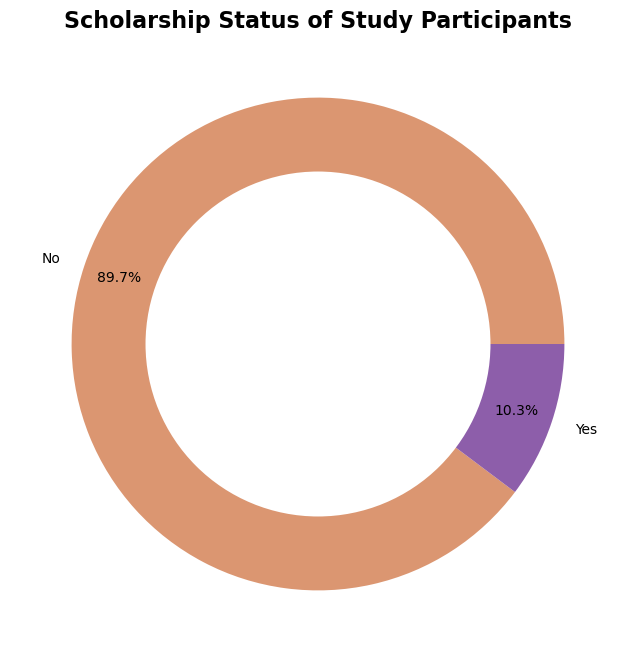

In [11]:
# Create a donut chart for the breakdown of scholarship vs no scholarship
plt.figure(figsize =(8,8))

schol_counts = df.scholarship.value_counts()
pielabels = list(schol_counts.index)
piedata= list(schol_counts.values)

plt.pie(piedata, colors = ["#db9671","#8d5eaa"],labels=pielabels,autopct="%1.1f%%", pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
fig.gca().add_artist(center_circle)


plt.title("Scholarship Status of Study Participants", fontweight = "bold", fontsize = 16)


plt.show()

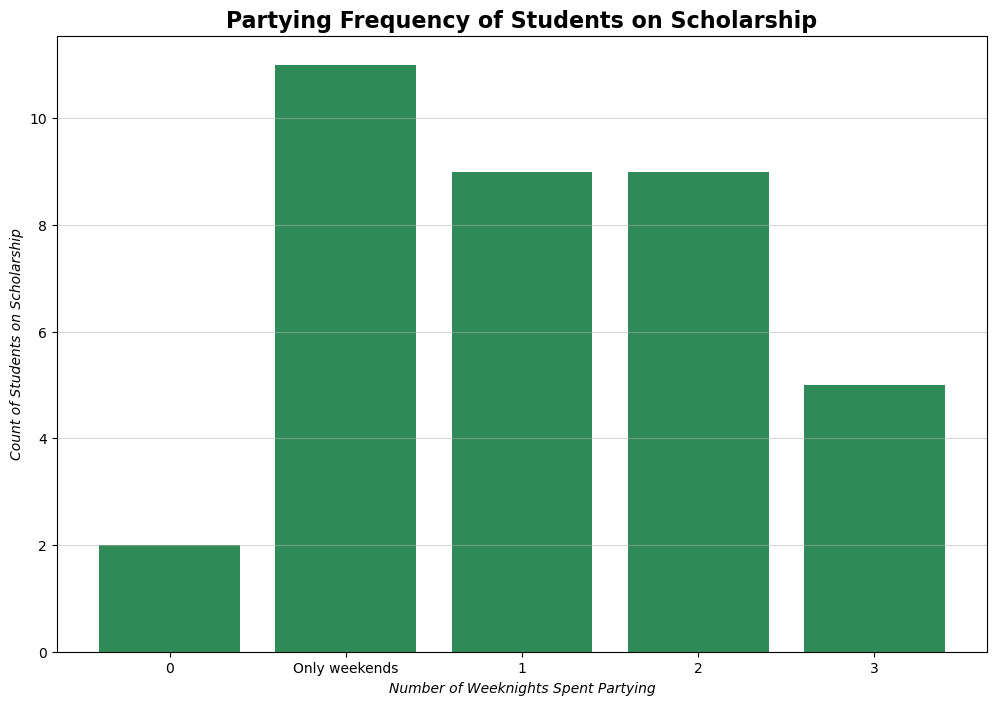

In [20]:
# Generate a bar plot showing the number of weeknights spent partying per week by students on scholarship
plt.figure(figsize =(12,8))

schol_party = df_schol["partying_frequency"].value_counts()
x = list(schol_party.index)
y = list(schol_party.values)

# Reorder the values so they present logically
reorder = [4, 0, 1, 2, 3]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]

plt.bar(x_reordered,y_reordered, color = "seagreen")

plt.xlabel("Number of Weeknights Spent Partying", fontstyle = "italic")
plt.ylabel("Count of Students on Scholarship", fontstyle = "italic")
plt.title("Partying Frequency of Students on Scholarship", fontweight = "bold", fontsize = 16)

#custom_order = ["0", "only weekends", "1", "2", "3"]
#plt.xticks(range(len(custom_order)), custom_order)

plt.grid(axis='y', alpha = .5)

plt.show()

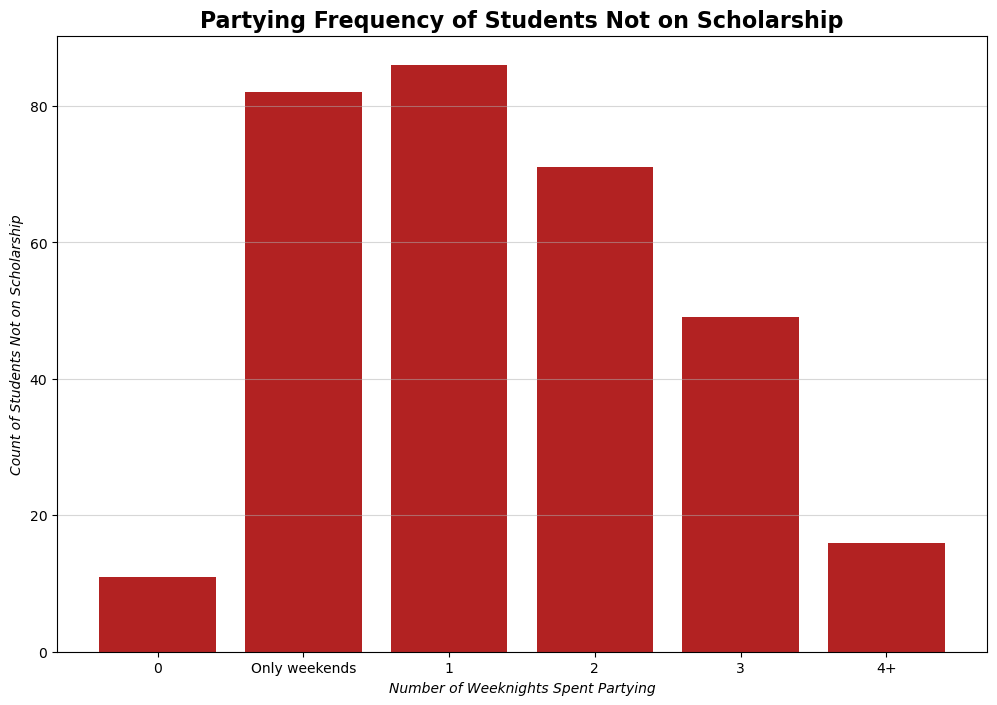

In [22]:
# Generate a bar plot showing the number of weeknights spent partying per week by students not on scholarship
plt.figure(figsize =(12,8))

no_schol_party = df_no_schol["partying_frequency"].value_counts()
x = list(no_schol_party.index)
y = list(no_schol_party.values)

# Reorder the values so they present logically
reorder = [5, 1, 0, 2, 3, 4]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]

plt.bar(x_reordered,y_reordered, color = "Firebrick")

plt.xlabel("Number of Weeknights Spent Partying", fontstyle = "italic")
plt.ylabel("Count of Students Not on Scholarship", fontstyle = "italic")
plt.title("Partying Frequency of Students Not on Scholarship", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .5)

plt.show()

In [31]:
# Generate a bar plot showing the average alcohol volume on nights out by students on scholarship
plt.figure(figsize =(12,8))

schol_drinks = df_schol["drinks_consumed"].value_counts()
x = list(schol_drinks.index)
y = list(schol_drinks.values)

plt.bar(x,y, color = "seagreen")

plt.xlabel("Number of Drinks Consumed on a Night Out", fontstyle = "italic")
plt.ylabel("Count of Students on Scholarship", fontstyle = "italic")
plt.title("Drinks Consumed on a Night Out by Students on Scholarship", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .5)

plt.show()

TypeError: Series.sort_values() got an unexpected keyword argument 'by'

<Figure size 1200x800 with 0 Axes>

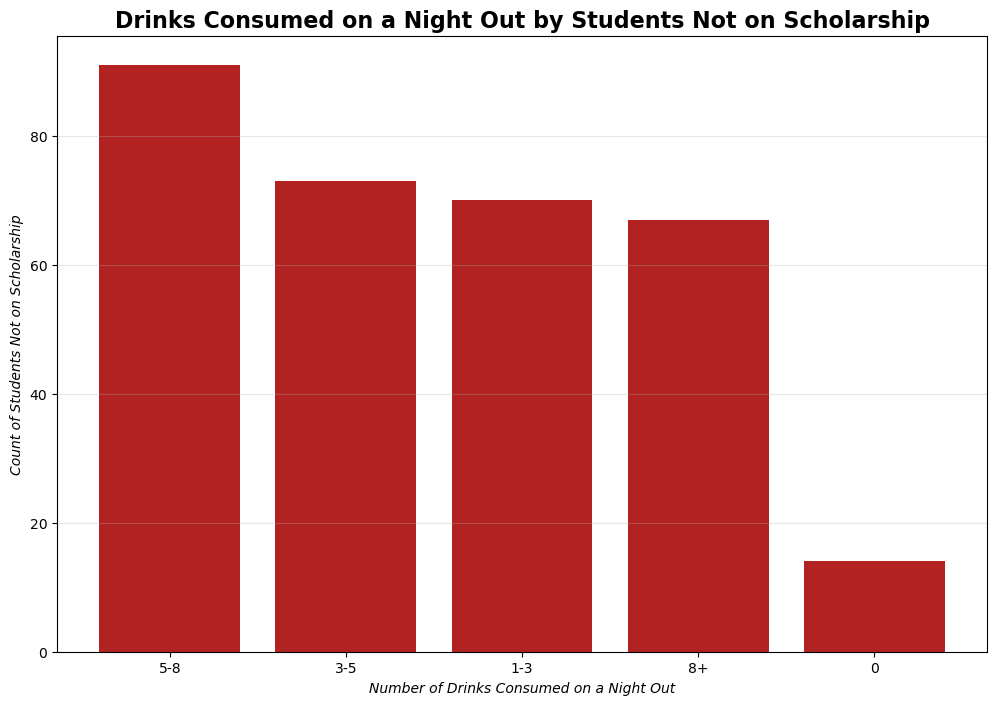

In [29]:
# Generate a bar plot showing the average alcohol volume on nights out by students on scholarship
plt.figure(figsize =(12,8))

no_schol_drinks = df_no_schol["drinks_consumed"].value_counts()
x = list(no_schol_drinks.index)
y = list(no_schol_drinks.values)

plt.bar(x,y, color = "firebrick")

plt.xlabel("Number of Drinks Consumed on a Night Out", fontstyle = "italic")
plt.ylabel("Count of Students Not on Scholarship", fontstyle = "italic")
plt.title("Drinks Consumed on a Night Out by Students Not on Scholarship", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .3, linestyle = '-')

plt.show()